## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    """Code Here.
    建立你的神經網路
    """


In [18]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.8476 - acc: 0.3413 - val_loss: 1.6795 - val_acc: 0.4050
Epoch 2/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.6077 - acc: 0.4297 - val_loss: 1.5836 - val_acc: 0.4388
Epoch 3/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.5183 - acc: 0.4608 - val_loss: 1.5379 - val_acc: 0.4516
Epoch 4/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.4502 - acc: 0.4841 - val_loss: 1.4829 - val_acc: 0.4788
Epoch 5/50
50000/50000 [==============================] - 20s 391us/step - loss: 1.3995 - acc: 0.5016 - val_loss: 1.4648 - val_acc: 0.4860
Epoch 6/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.3651 - acc: 0.5144 - val_loss: 1.4305 - val_acc: 0.4862
Epoch 7/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.3220 - acc: 0.5313 - val_loss: 1.

50000/50000 [==============================] - 18s 369us/step - loss: 2.0445 - acc: 0.2678 - val_loss: 1.8713 - val_acc: 0.3482
Epoch 2/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.8068 - acc: 0.3654 - val_loss: 1.7477 - val_acc: 0.3894
Epoch 3/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.7108 - acc: 0.4021 - val_loss: 1.6746 - val_acc: 0.4154
Epoch 4/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.6476 - acc: 0.4211 - val_loss: 1.6245 - val_acc: 0.4324
Epoch 5/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.5974 - acc: 0.4408 - val_loss: 1.5892 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.5575 - acc: 0.4558 - val_loss: 1.5678 - val_acc: 0.4470
Epoch 7/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.5232 - acc: 0.4660 - val_loss: 1.5472 - val_acc: 0.4526
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 18s 362us/step - loss: 2.1519 - acc: 0.2406 - val_loss: 2.1093 - val_acc: 0.2594
Epoch 3/50
50000/50000 [==============================] - 19s 380us/step - loss: 2.0707 - acc: 0.2726 - val_loss: 2.0385 - val_acc: 0.2791
Epoch 4/50
50000/50000 [==============================] - 22s 438us/step - loss: 2.0088 - acc: 0.2966 - val_loss: 1.9846 - val_acc: 0.3060
Epoch 5/50
50000/50000 [==============================] - 21s 427us/step - loss: 1.9617 - acc: 0.3139 - val_loss: 1.9439 - val_acc: 0.3200
Epoch 6/50
50000/50000 [==============================] - 20s 409us/step - loss: 1.9258 - acc: 0.3283 - val_loss: 1.9128 - val_acc: 0.3354
Epoch 7/50
50000/50000 [==============================] - 22s 450us/step - loss: 1.8978 - acc: 0.3383 - val_loss: 1.8892 - val_acc: 0.3404
Epoch 8/50
50000/50000 [==============================] - 21s 428us/step - loss: 1.8755 - acc: 0.3451 - val_loss: 1.8685 - val_acc: 0.3464
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 18s 365us/step - loss: 2.2618 - acc: 0.1817 - val_loss: 2.2541 - val_acc: 0.1876
Epoch 4/50
50000/50000 [==============================] - 18s 358us/step - loss: 2.2438 - acc: 0.1956 - val_loss: 2.2378 - val_acc: 0.1986
Epoch 5/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.2280 - acc: 0.2075 - val_loss: 2.2226 - val_acc: 0.2091
Epoch 6/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.2133 - acc: 0.2158 - val_loss: 2.2080 - val_acc: 0.2194
Epoch 7/50
50000/50000 [==============================] - 18s 364us/step - loss: 2.1988 - acc: 0.2244 - val_loss: 2.1936 - val_acc: 0.2266
Epoch 8/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.1847 - acc: 0.2333 - val_loss: 2.1795 - val_acc: 0.2327
Epoch 9/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.1711 - acc: 0.2392 - val_loss: 2.1662 - val_acc: 0.2400
Epoch 10/50
50000/50000 [==

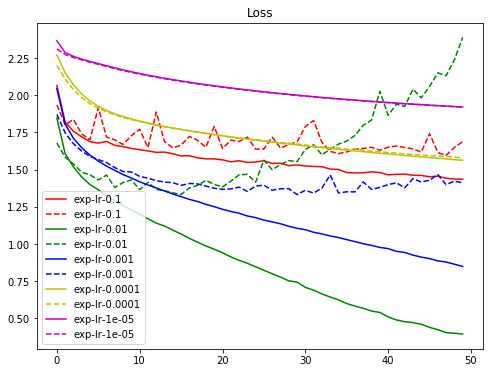

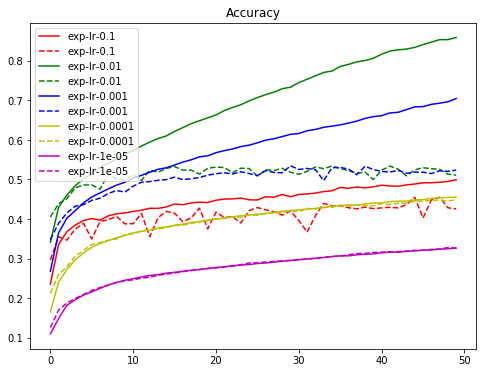

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()